In [ ]:
# Install required packages
!pip install -q groq python-magic-bin pillow ipywidgets


In [ ]:

# Full Image Summarizer Chatbot using Groq in Jupyter
import base64
from groq import Groq
from IPython.display import display
import ipywidgets as widgets
import magic
from PIL import Image as PILImage
from io import BytesIO

# Initialize Groq client with your API key
client = Groq(api_key="xxx")  # 🔑 Replace with your actual API key

# Upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

def process_uploaded_image(change):
    if upload_widget.value:
        uploaded_filename = list(upload_widget.value.keys())[0]
        uploaded_bytes = upload_widget.value[uploaded_filename]['content']
        
        # Show image
        display(PILImage.open(BytesIO(uploaded_bytes)))

        # Detect mime type
        mime_type = magic.from_buffer(uploaded_bytes, mime=True)

        # Convert to base64 data URL
        encoded_image = base64.b64encode(uploaded_bytes).decode("utf-8")
        image_data_url = f"data:{mime_type};base64,{encoded_image}"

        print("\n⏳ Generating summary... Please wait...\n")

        # Call Groq API
        completion = client.chat.completions.create(
            model="meta-llama/llama-4-scout-17b-16e-instruct",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": "provide me the summary of the given image"},
                        {"type": "image_url", "image_url": {"url": image_data_url}}
                    ]
                }
            ],
            temperature=1,
            max_completion_tokens=1024,
            top_p=1,
            stream=True,
            stop=None,
        )

        summary = ""
        for chunk in completion:
            content = chunk.choices[0].delta.content
            if content:
                summary += content
                print(content, end="")

upload_widget.observe(process_uploaded_image, names='value')


FileUpload(value=(), accept='image/*', description='Upload')

AttributeError: 'tuple' object has no attribute 'keys'

FileUpload(value=(), accept='image/*', description='Upload')

ValueError: Could not save to JPEG for display

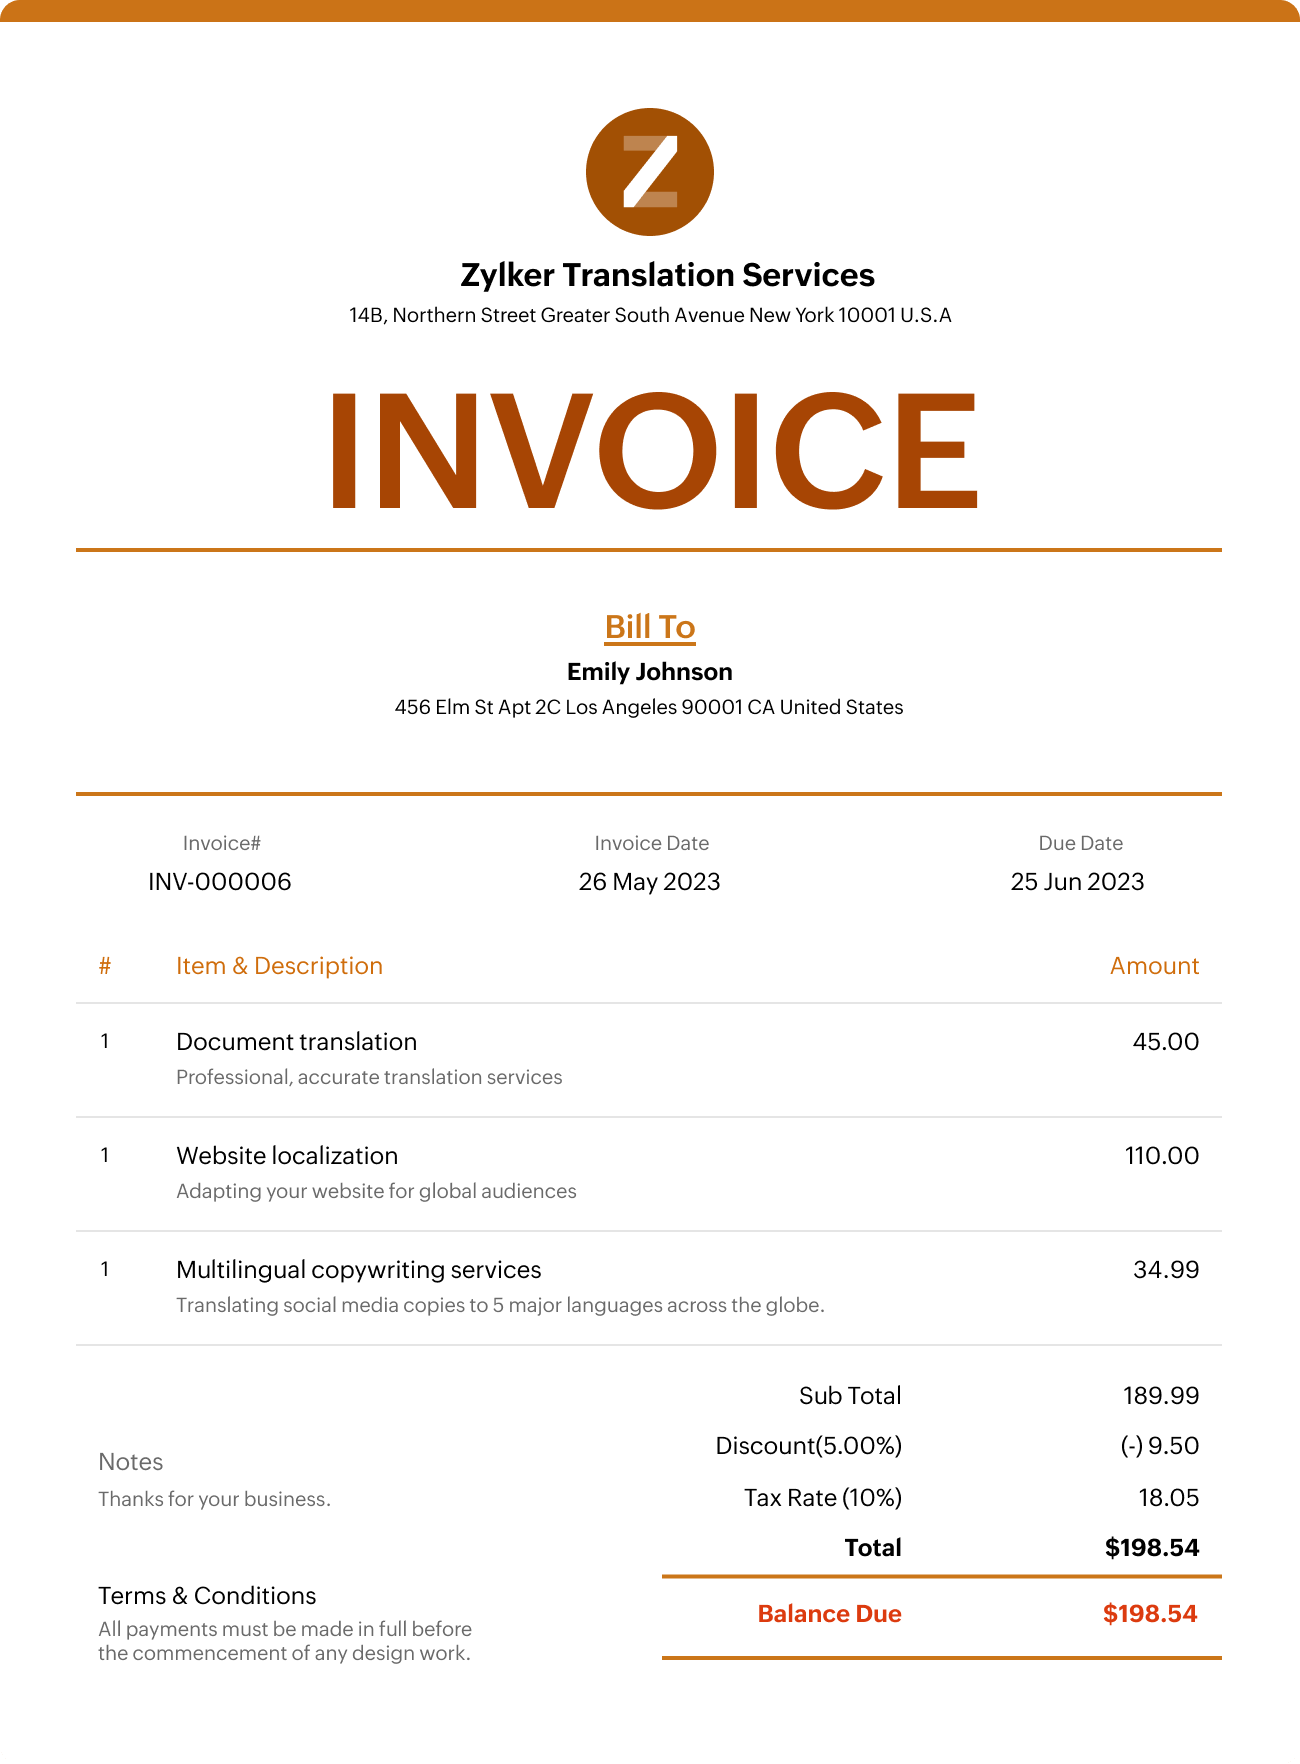

ArgumentError: argument 2: TypeError: wrong type

In [ ]:


# Import libraries
import base64
from groq import Groq
from IPython.display import display
import ipywidgets as widgets
import magic
from PIL import Image as PILImage
from io import BytesIO

# Initialize Groq client (replace with your API key)
client = Groq(api_key="xxxx")  # ← Replace this with your actual API key

# Upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

def process_image_summary(upload_widget_value):
    if upload_widget_value:
        file_info = list(upload_widget_value)[0]
        uploaded_bytes = file_info['content']

        # Display the image
        display(PILImage.open(BytesIO(uploaded_bytes)))

        # Detect MIME type
        mime_type = magic.from_buffer(uploaded_bytes, mime=True)

        # Encode image to base64
        encoded_image = base64.b64encode(uploaded_bytes).decode("utf-8")
        image_data_url = f"data:{mime_type};base64,{encoded_image}"

        print("\n⏳ Generating summary... Please wait...\n")

        # Call Groq LLaMA-4 model
        completion = client.chat.completions.create(
            model="meta-llama/llama-4-scout-17b-16e-instruct",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": "provide me the summary of the given image"},
                        {"type": "image_url", "image_url": {"url": image_data_url}}
                    ]
                }
            ],
            temperature=1,
            max_completion_tokens=1024,
            top_p=1,
            stream=True,
            stop=None,
        )

        summary = ""
        for chunk in completion:
            content = chunk.choices[0].delta.content
            if content:
                summary += content
                print(content, end="")

# Trigger summary generation after upload
def on_upload_change(change):
    if change["new"]:
        process_image_summary(change["new"])

upload_widget.observe(on_upload_change, names='value')


FileUpload(value=({'name': 'freelance-invoice-template-1x.png', 'type': 'image/png', 'size': 47642, 'content':…

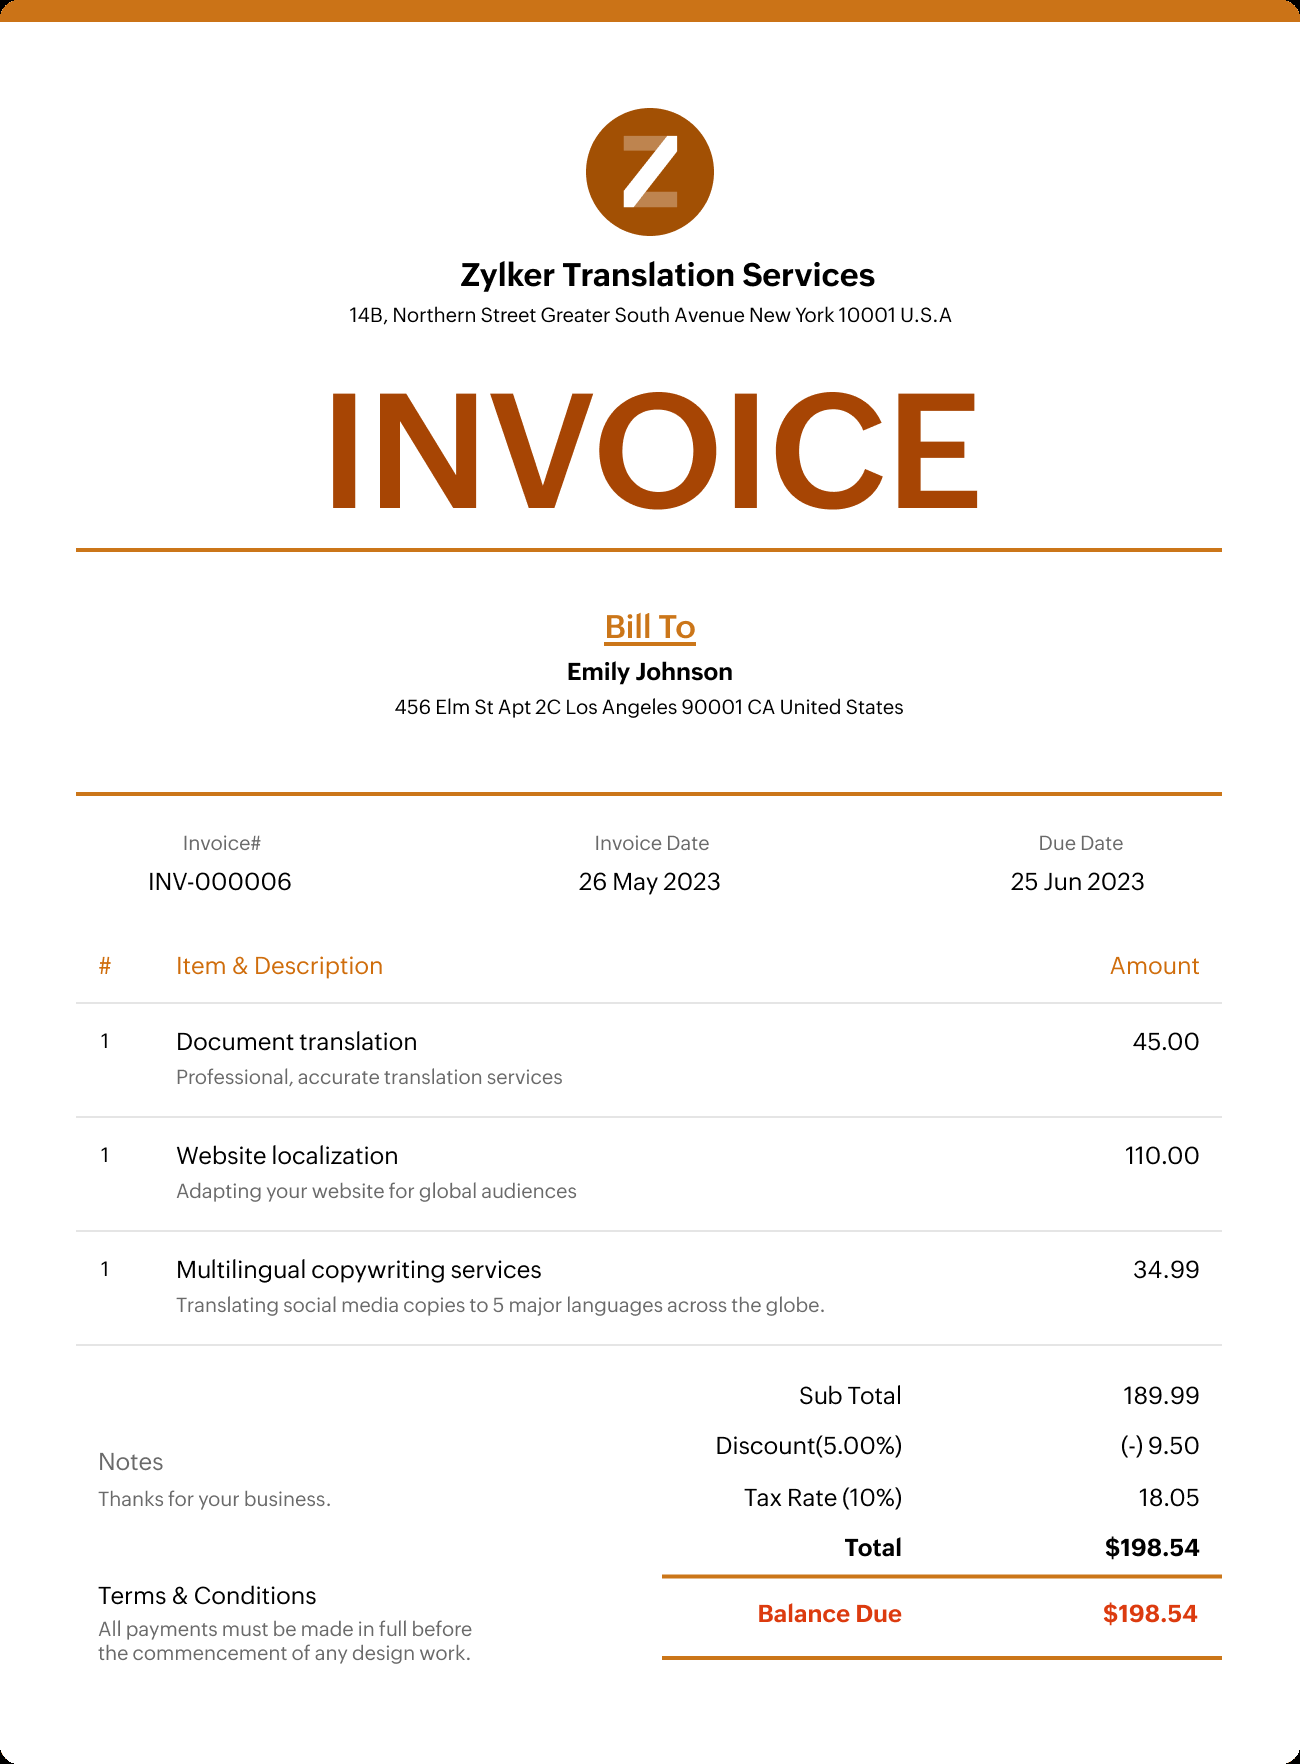

In [ ]:
# Install required packages (run only once)
!pip install -q groq ipywidgets pillow

import base64
from groq import Groq
from IPython.display import display, Image as IPImage, clear_output
import ipywidgets as widgets
from PIL import Image as PILImage
from io import BytesIO

# Groq client
client = Groq(api_key="xxxx")  # Replace with your actual key

# Upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

def get_uploaded_file_bytes():
    # Compatibility: Handle both dict and tuple structures
    if isinstance(upload_widget.value, dict):
        file_info = list(upload_widget.value.values())[0]
    elif isinstance(upload_widget.value, tuple) and len(upload_widget.value) > 0:
        file_info = upload_widget.value[0]
    else:
        raise ValueError("No file uploaded or unsupported format")
    return file_info['content']

def get_mime_type(uploaded_bytes):
    try:
        img = PILImage.open(BytesIO(uploaded_bytes))
        fmt = img.format.lower()
        return f"image/{fmt}"
    except:
        return "image/png"

def process_uploaded_image(change):
    clear_output(wait=True)
    display(upload_widget)

    try:
        uploaded_bytes = get_uploaded_file_bytes()

        # Convert image to RGB to avoid mode errors
        img = PILImage.open(BytesIO(uploaded_bytes)).convert("RGB")
        buffer = BytesIO()
        img.save(buffer, format="PNG")
        display(IPImage(data=buffer.getvalue()))

        # Encode image as base64 data URL
        mime_type = get_mime_type(uploaded_bytes)
        encoded_image = base64.b64encode(uploaded_bytes).decode("utf-8")
        image_data_url = f"data:{mime_type};base64,{encoded_image}"

        print("\n⏳ Generating summary...")

        # Groq API call
        completion = client.chat.completions.create(
            model="llama-3.3-70b-versatile",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": "provide me the summary of the given image"},
                        {"type": "image_url", "image_url": {"url": image_data_url}}
                    ]
                }
            ],
            temperature=1,
            max_completion_tokens=1024,
            top_p=1,
            stream=True,
            stop=None,
        )

        summary = ""
        for chunk in completion:
            content = chunk.choices[0].delta.content
            if content:
                summary += content
                print(content, end="")

    except Exception as e:
        print(f"\n❌ Error: {e}")

# Trigger image processing on file upload
upload_widget.observe(process_uploaded_image, names='value')


In [ ]:
# WAS CHECKING THE API WHETHER WORKING OR NOT


from groq import Groq

client = Groq(api_key="xxxx")  # Replace with your actual key

response = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "user", "content": "hII"}
    ]
)

print(response.choices[0].message.content)


It's nice to meet you. Is there something I can help you with or would you like to chat.


In [15]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

print(pytesseract.get_tesseract_version())


5.5.0.20241111
